In [39]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [40]:
from tensorflow import keras
from tensorflow.keras import layers

In [41]:
df = pd.read_csv('/content/forest.csv')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [43]:
df.month.unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [44]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [45]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

day_mapping = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7
}

df['month'] = df['month'].map(month_mapping)
df['day'] = df['day'].map(day_mapping)

In [46]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [47]:
df.duplicated().sum()

4

In [48]:
df = df.drop_duplicates()

In [49]:
train = df.sample(frac = 0.7,random_state=0)
test = df.drop(train.index)

In [50]:
train.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,4.704735,4.323120,7.465181,4.242340,90.457939,108.205014,543.335655,8.884123,18.672702,44.637883,4.079666,0.027855,14.505237
std,2.368734,1.262389,2.299693,2.059124,6.023384,62.553715,252.937899,4.689629,5.762131,16.765631,1.802048,0.352015,73.901450
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,4.600000,18.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,56.700000,423.400000,6.300000,15.400000,32.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.500000,8.400000,19.000000,42.000000,4.000000,0.000000,0.610000
75%,7.000000,5.000000,9.000000,6.000000,92.550000,141.150000,714.300000,10.700000,22.450000,54.000000,5.400000,0.000000,6.430000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [51]:
scaling_features = ['FFMC', 'DMC', 'DC']

In [52]:
train_features = train.copy()
test_features = test.copy()

train_label = train_features.pop('area')
test_label = test_features.pop('area')

In [53]:
train_features.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
286,7,6,7,3,91.2,183.1,437.7,12.5,12.6,90,7.6,0.2
102,2,4,8,2,94.8,108.3,647.1,17.0,20.1,40,4.0,0.0
37,7,4,10,5,90.0,41.5,682.6,8.7,11.3,60,5.4,0.0
46,5,6,9,1,90.9,126.5,686.5,7.0,14.7,70,3.6,0.0
378,6,5,3,4,90.9,18.9,30.6,8.0,8.7,51,5.8,0.0


In [54]:
def plot(feature,x=None,y=None):
  plt.figure(figsize=(10,8))
  plt.scatter(train_features[feature],train_label,label = 'Data')
  if x is not None and y is not None:
    plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel(feature)
  plt.ylabel('area')
  plt.legend()

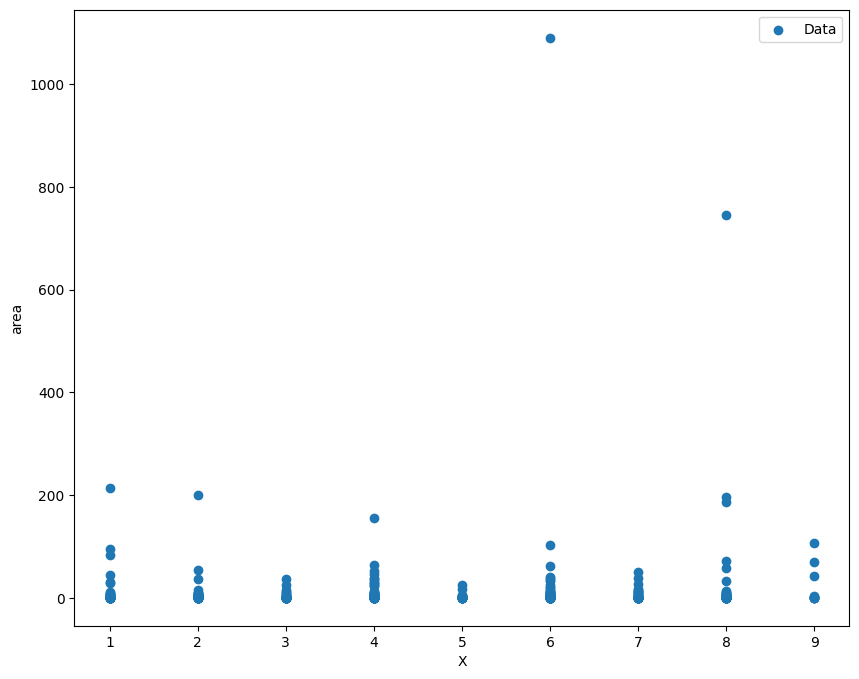

In [55]:
plot('X')

In [69]:
from tensorflow.keras.layers.experimental import preprocessing

scaler = preprocessing.Normalization()


In [64]:
scaler.adapt(np.array(train_features))
train_features_normalized = scaler.adapt(np.array(train_features))

In [58]:
model = tf.keras.Sequential([
    scaler,
    layers.Dense(units=1)
])

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normaliza  (None, 12)                25        
 tion)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 38 (156.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 25 (104.00 Byte)
_________________________________________________________________


In [60]:
optim = tf.optimizers.Adam(learning_rate=0.1)
loss = keras.losses.MeanAbsoluteError()

In [61]:
model.compile(optimizer=optim,loss = loss)

In [62]:
fitting = model.fit(train_features,train_label,epochs = 100,verbose = 1,validation_split=0.2)
model.evaluate(test_features,test_label,verbose = 1)

Epoch 1/100
9/9 [==============================] - 1s 23ms/step - loss: 15.6712 - val_loss: 10.6580
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 15.5140 - val_loss: 10.6081
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 15.4611 - val_loss: 10.6016
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 15.4386 - val_loss: 10.6297
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 15.4226 - val_loss: 10.6983
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 15.4190 - val_loss: 10.5785
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 15.4083 - val_loss: 10.5769
Epoch 8/100
9/9 [==============================] - 0s 7ms/step - loss: 15.4050 - val_loss: 10.5508
Epoch 9/100
9/9 [==============================] - 0s 9ms/step - loss: 15.3987 - val_loss: 10.5497
Epoch 10/100
9/9 [==============================] - 0s 6ms/step - loss: 15.4183 - val_loss: 10.5809
Epoch 11

9.280620574951172